** Convolutional Neural Networks**

---

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import \
    Conv2D, MaxPool2D, Dropout, Flatten, Dense
import matplotlib.pyplot as plt
from skimage.io import imread

from IPython.display import clear_output

2024-05-07 03:45:13.086080: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-07 03:45:14.771227: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-07 03:45:14.771326: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-07 03:45:15.075318: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-07 03:45:15.653547: I tensorflow/core/platform/cpu_feature_guar

In [ ]:
import glob, os
import numpy as np
import shutil

for folder in glob.glob('../data/train/*/'):

    idx = np.random.choice(len(os.listdir(folder)), 5, replace=False)

    for i in idx:
        if not (os.path.exists('../data/train_5/'+folder.split('/')[-2])):
            os.mkdir('../data/train_5/'+folder.split('/')[-2])
        shutil.copy(folder+os.listdir(folder)[i], '../data/train_5/'+folder.split('/')[-2]+os.sep+os.listdir(folder)[i])

## **Run your model**

In [ ]:
!python main.py --task 3 --model_name 'ensemble'

In [ ]:
from models import YourModel, VGGModel, Pretrained_model


model = Pretrained_model('vgg')

model(tf.keras.Input(shape=(224, 224, 3)))

model.compile(
        optimizer=model.optimizer,
        loss=model.loss_fn,
        metrics=["sparse_categorical_accuracy"])

In [ ]:
model.base_model.load_weights('vgg16_imagenet.h5', by_name=True)

In [ ]:
import os
from datetime import datetime
from tensorboard_utils import \
        ImageLabelingLogger, ConfusionMatrixLogger, CustomModelSaver

time_now = datetime.now()
timestamp = time_now.strftime("%m%d%y-%H%M%S")

checkpoint_path = "checkpoints/"+"{}_model".format('vgg') + os.sep + timestamp + os.sep
logs_path = "logs" + os.sep + "{}_model".format('vgg') + os.sep + timestamp + os.sep


callback_list = [
        tf.keras.callbacks.TensorBoard(
            log_dir=logs_path,
            update_freq='batch',
            profile_batch=0),
        ImageLabelingLogger(logs_path, datasets),
        CustomModelSaver(checkpoint_path, 3, 5)
    ]


model.fit(
        x=datasets.train_data,
        validation_data=datasets.test_data,
        epochs=50,
        batch_size=None,            # Required as None as we use an ImageDataGenerator; see preprocess.py get_data()
        callbacks=callback_list,
        initial_epoch=0,
    )

In [ ]:
!python main.py --task 1 --model_name 'vgg'

In [ ]:
!python main.py --task 3 --model_name 'efficientnet'

**Choosing a checkpoint**

You can load from a specific checkpoint if your current model architecture is the **same** as your model at that checkpoint.

View your checkpoints timestamps and pick one from the list below. The last folder in the list contains your latest training results.

In [ ]:
%ls -lh checkpoints/ensemble_model/050624-142007/model.25_0.791959822177887.weights.h5
# /050224-151318/model.29_0.7082077264785767.weights.h5

total 93M
-rw-r--r-- 1 rrwang_umass_edu rrwang_umass_edu 212K May  6 14:56 model.25_0.791959822177887.weights.h5
-rw-r--r-- 1 rrwang_umass_edu rrwang_umass_edu  13M May  6 14:56 model_head1.25_0.791959822177887.weights.h5
-rw-r--r-- 1 rrwang_umass_edu rrwang_umass_edu  50M May  6 14:56 model_head2.25_0.791959822177887.weights.h5
-rw-r--r-- 1 rrwang_umass_edu rrwang_umass_edu  31M May  6 14:56 model_head3.25_0.791959822177887.weights.h5


Replace [TIMESTAMP] below with the checkpoint timestamp you've chosen to get a list of model weights.

In [ ]:
# TODO: replace [TIMESTAMP] with the timestamp you choose from the last step
%ls checkpoints/vgg_model/050224-133628/model.30_0.7554438710212708.weights.h5

model.20_0.7206029891967773.weights.h5  model.29_0.7544388771057129.weights.h5
model.26_0.7273032069206238.weights.h5  model.30_0.7554438710212708.weights.h5
model.27_0.7343383431434631.weights.h5


Choose a model from the list above and replace [TIMESTAMP]/[MODEL_FILENAME] with your timestamp and checkpoint file. The last file contains your latest training weights. If you want, you can use the following command to continue training the model with specific weights.

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs

**Lime Interpreter**

Choose an image your model falsely classified and add it to the end of the command below (replace misclassified/your_model/Bedroom/Store_predicted.png with the path to your image)


**Where to find misclassified images?**
- Under your code folder, find folder **misclassfied**. In the folder you can look for the misclassifed images in their groundtruth category folder, with their names explaining what they are misclassified as. Pick an example you like.

In [ ]:
import glob
import os

ckpt_path = glob.glob('checkpoints/ensemble_model/050724-025718/model.*')[0]
for file in glob.glob('misclassified/ensemble_model/050724-025718/*/*.png'):

    os.system("python main2.py --task 3 --model_name 'ensemble' --load-checkpoint {} --evaluate --lime-image {}".format(ckpt_path, file))

    clear_output()

In [ ]:
import glob
import os

ckpt_path = glob.glob('checkpoints/ensemble_model/050724-030041/model.*')[0]
for file in glob.glob('misclassified/ensemble_model/050724-030041/*/*.png'):

    os.system("python main2.py --task 3 --model_name 'ensemble' --load-checkpoint {} --evaluate --lime-image {}".format(ckpt_path, file))

    # clear_output()

In [ ]:
import glob
import os

ckpt_path = 'checkpoints/ensemble_model/050624-175429/model.49_0.8308207988739014.weights.h5'
for file in glob.glob('misclassified/ensemble_model/050624-175429/*/*.png'):

    os.system("python main.py --task 3 --model_name 'ensemble' --load-checkpoint {} --evaluate --lime-image {}".format(ckpt_path, file))

    clear_output()


ckpt_path = glob.glob('checkpoints/ensemble_model/050624-212347/*')[0]
for file in glob.glob('misclassified/ensemble_model/050624-212347/*/*.png'):

    os.system("python main.py --task 3 --model_name 'ensemble' --load-checkpoint {} --evaluate --lime-image {}".format(ckpt_path, file))

    clear_output()


In [ ]:
import os
import glob

ckpt_path = 'checkpoints/vgg_model/050224-151318/model.29_0.7082077264785767.weights.h5'
for file in glob.glob('misclassified/vgg_model/050224-151318/*/*.png'):

    os.system("python main.py --task 1 --model_name 'vgg' --load-checkpoint {} --evaluate --lime-image {}".format(ckpt_path, file))

    clear_output()

ckpt_path = 'checkpoints/vgg_model/050224-133628/model.30_0.7554438710212708.weights.h5'
for file in glob.glob('misclassified/vgg_model/050224-133628/*/*.png'):

    os.system("python main.py --task 1 --model_name 'vgg' --load-checkpoint {} --evaluate --lime-image {}".format(ckpt_path, file))

    clear_output()

ckpt_path = 'checkpoints/vgg_model/050124-000319/model.15_0.8887771964073181.weights.h5'
for file in glob.glob('misclassified/vgg_model/050124-000319/*/*.png'):

    os.system("python main.py --task 1 --model_name 'vgg' --load-checkpoint {} --evaluate --lime-image {}".format(ckpt_path, file))

    clear_output()

In [ ]:
import os
import glob

ckpt_path = 'checkpoints/efficientnet_model/050124-000148/model.37_0.8572864532470703.weights.h5'
for file in glob.glob('misclassified/efficientnet_model/050224-135859/*/*.png'):

    os.system("python main.py --task 3 --model_name 'efficientnet' --load-checkpoint {} --evaluate --lime-image {}".format(ckpt_path, file))

    clear_output()

ckpt_path = 'checkpoints/efficientnet_model/050224-135859/model.49_0.7628140449523926.weights.h5'
for file in glob.glob('misclassified/efficientnet_model/050224-135859/*/*.png'):

    os.system("python main.py --task 3 --model_name 'efficientnet' --load-checkpoint {} --evaluate --lime-image {}".format(ckpt_path, file))

    clear_output()


ckpt_path = 'checkpoints/efficientnet_model/050224-155645/model.37_0.6546063423156738.weights.h5'
for file in glob.glob('misclassified/efficientnet_model/050224-155645/*/*.png'):

    os.system("python main.py --task 3 --model_name 'efficientnet' --load-checkpoint {} --evaluate --lime-image {}".format(ckpt_path, file))

    clear_output()

In [ ]:
import os
import glob

ckpt_path = 'checkpoints/resnet_model/050124-000146/model.45_0.8978224396705627.weights.h5'
for file in glob.glob('misclassified/resnet_model/050124-000146/*/*.png'):

    os.system("python main.py --task 3 --model_name 'resnet' --load-checkpoint {} --evaluate --lime-image {}".format(ckpt_path, file))

    clear_output()

# ckpt_path = 'checkpoints/resnet_model/050224-134004/model.29_0.7708542943000793.weights.h5'
# for file in glob.glob('misclassified/resnet_model/050224-134004/*/*.png'):

#     os.system("python main.py --task 3 --model_name 'resnet' --load-checkpoint {} --evaluate --lime-image {}".format(ckpt_path, file))

#     clear_output()


# ckpt_path = 'checkpoints/resnet_model/050224-155957/model.35_0.7343383431434631.weights.h5'
# for file in glob.glob('misclassified/resnet_model/050224-155957/*/*.png'):

#     os.system("python main.py --task 3 --model_name 'resnet' --load-checkpoint {} --evaluate --lime-image {}".format(ckpt_path, file))

#     clear_output()

**[Optional] Display Lime Interpreter Images**

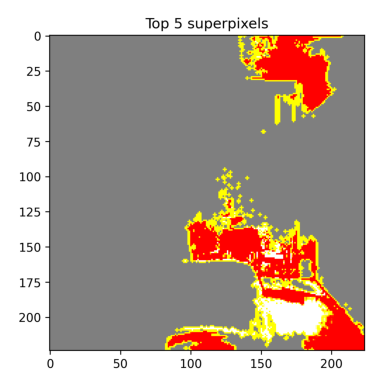

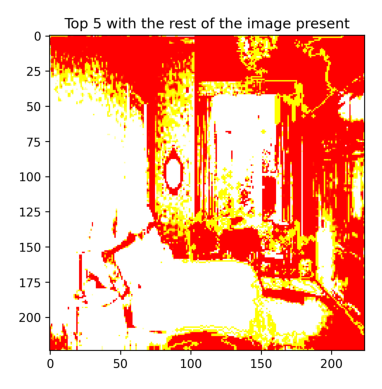

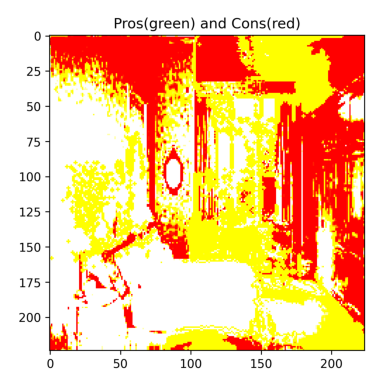

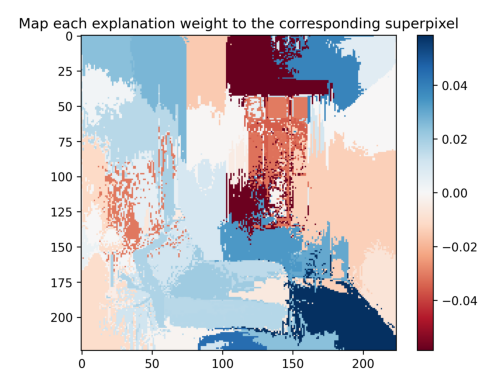

In [ ]:
# In order to see the images, replace <TIMESTAMP> with your own timestamp
for i in range(4):
    plot_img = imread('lime_explainer_images/043024-170335/' + str(i) + '.png')
    plt.imshow(plot_img)
    plt.axis(False)
    plt.show()